# Feature Information  

With this application you will be able to evaluate how many calories you would burn during a specific duration.This app takes some parameters such as your age , gender , exercise duration etc. and then this app evaluates the amount of calories you would burn.In addition, you will be able to observe similar results and general informations(according to the parameter values that you would enter into application).

This project is made up of a simple machine learning algorithm(RandomForestRegressor) from sklearn library.Various concepts implemented in this project such as EDA , [Pearson] Correlation , Learning Curve etc.

1.User_ID : The ID of the person which is unique.

2.Gender : Gender of the person.

3.Age : Age of the person.

4.Height : Height of the person in  cm .

5.Weight : Weight of the person in  kg .

6.Duration : Duration of the person's exercise/activity.

7.Heart_Rate : Heart rate per  min  of the person.

8.Body_Temp : Body temperature of the person in  C∘ .

9.Calories : Calories burned in kilo calories.

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report


# Reading Dataset

In [3]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [4]:
calories 

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
exercise 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Combining the two Dataframes

In [6]:
data = pd.concat([exercise,calories.Calories], axis=1) # concat function used to combine two dataset
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [8]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
data.shape

(15000, 9)

In [10]:
# getting some informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
 # overall Statistic 
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


As we can see, the table above shows the Descriptive Statistics(for example centeral tendency) of each column or feature.

For example for Age column.%25 of the data lie between 20 and 28, anohter %25 lie between 28 and 39, and so on.The box plot shows the exact concept that I just mentioned.

The outliers are shown with dots in box plots.

# Boxplot

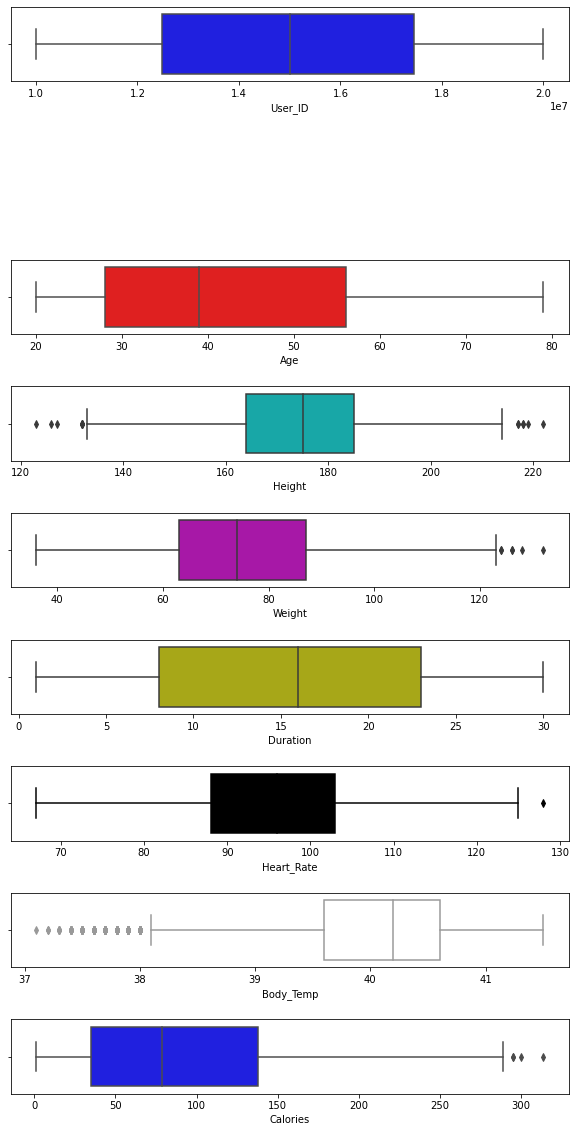

In [12]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(data.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(data.columns)) , data.columns):
  try:
    sns.boxplot(data = data, x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

In [13]:
# checking the number of rows and columns
data.shape

(15000, 9)

# Cleaning Dataset

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(15000, 9)

In the next step we have to delete User_ID feature.Because it is a low predictive feature.In other words, it is not only a useless feature for our calorie burned prediction model but also has a negative impact on model's accuracy.

In [16]:
data.drop(columns ="User_ID",inplace = True)


In [17]:
data.ndim

2

In [18]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [19]:
# checking for missing values
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

data is clean 

In [20]:
data.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

The dataset doesn't contain any missing values

# Data Visualization (EDA)

Finding the Correlation in the dataset

Positive Correlation Negative Correlation

In [21]:
corr=data.corr()
corr

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


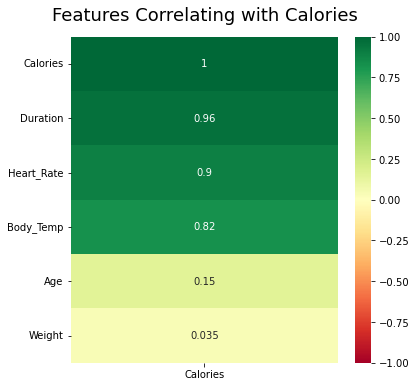

In [22]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(data.corr()[['Calories']].sort_values(by='Calories', ascending=False)[:-1], vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with Calories', fontdict={'fontsize':18}, pad=16);

# Distplot

<AxesSubplot:xlabel='Age', ylabel='Density'>

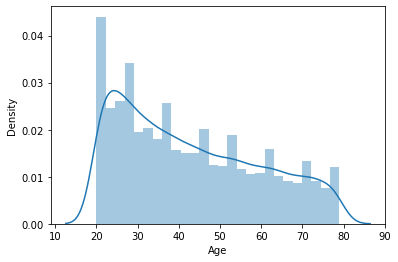

In [23]:
# finding the distribution of "Age" column
sns.distplot(data['Age'])

For age, more values between the age group of 20 and 30 can be seen. There is a peek in the curve means which we had
generated using 15000 instances. The decrease in the curve can be seen as people tend to not workout at an older age.

<AxesSubplot:xlabel='Height', ylabel='Density'>

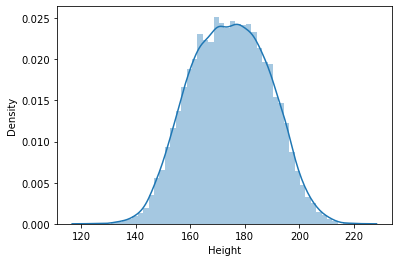

In [24]:
# finding the distribution of "Height" column
sns.distplot(data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

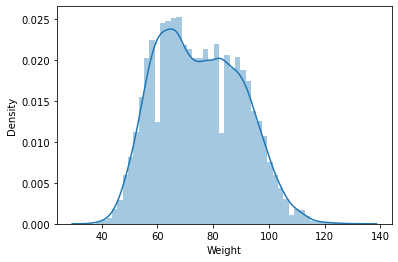

In [25]:
# finding the distribution of "Weight" column
sns.distplot(data['Weight'])

The relationship between the different records is then examined. There are two forms of correlation: positive correlation and negative correlation. The quantity of calories burned will increase as exercise duration increases. These values are therefore proportionate, i.e., in the same direction, and unquestionably connected

# Countplot

In [26]:
# plotting the gender column using Countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

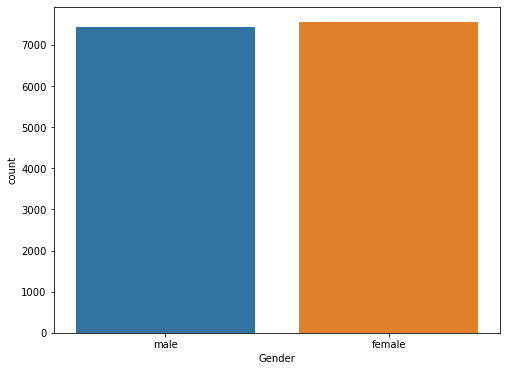

In [27]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data =data , x = "Gender")

# Pie-chart

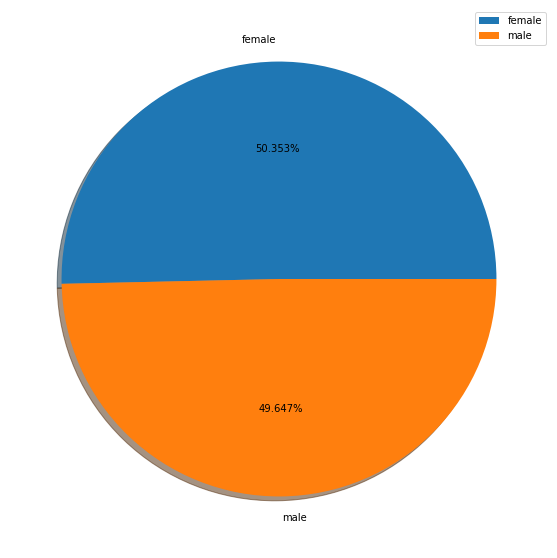

In [28]:
plt.figure(figsize=(10,10))
plt.pie(data.Gender.value_counts(),labels=data.Gender.value_counts().index,autopct="%.3f%%",shadow=True)
plt.legend()
plt.show()

As we can see, number of females are slightly higher than man but this distinction is not significant.we can say, in general, they are equal.

In [29]:
#Converting the text data to numerical values
data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [30]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


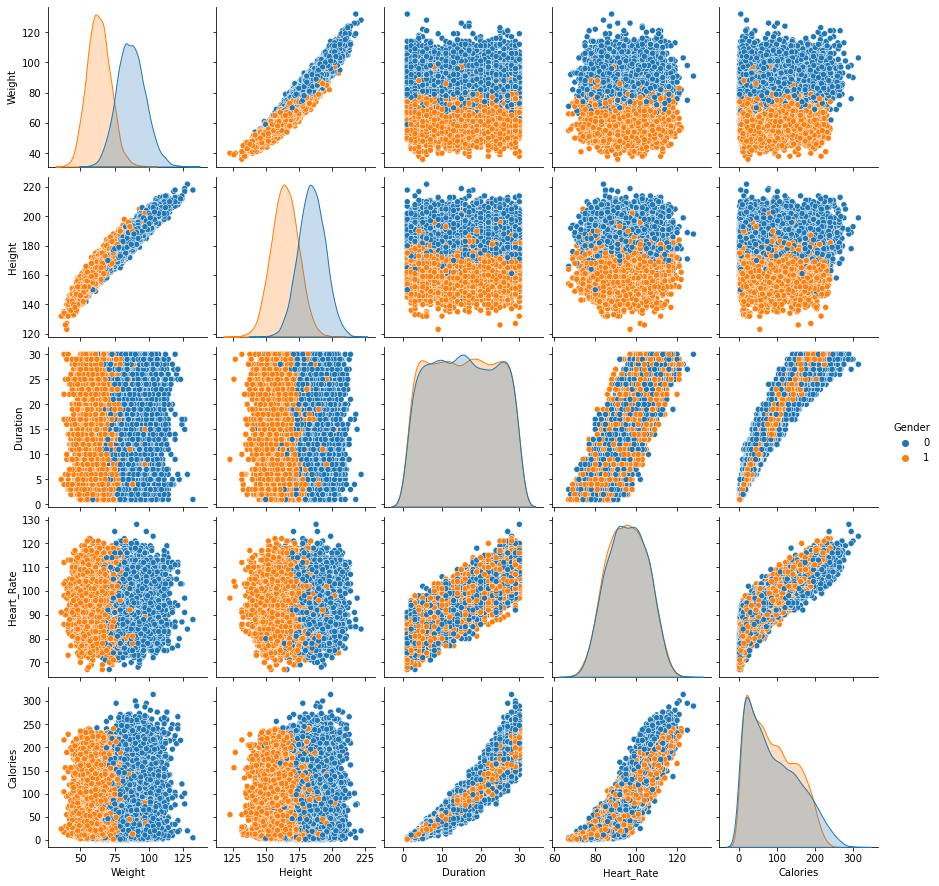

In [31]:
sns.pairplot(data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

As we can see from graphs above, there is not a specific correlation or relationship between most of the features in the dataset.For example,there is not a specific relationship between Duration and Weight or between Duration and Height.This is because exercisers may have different exercise duration no matter of their Weight and Height.

In some cases, a featrue has a low relationship with another feature, like Duration and Heart_Rate.Somehow(with low confident) we can say that the more time somebody exercises the more 'Heart Rate' per minute he/she will have.

In some cases , two featrues have a high relationship(in compare to last two cases), like Height and Weight.

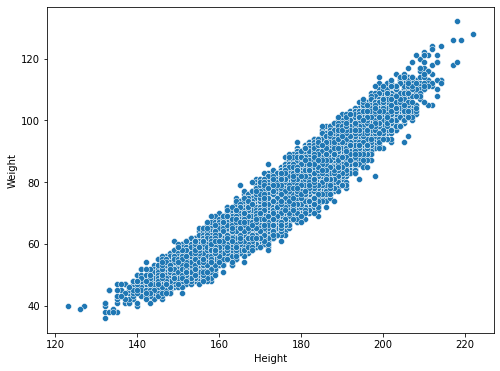

In [32]:
sns.scatterplot(data['Height'], data['Weight'])
plt.show()

So, we have a kind of linear relationship between these two features which is quite obvious.

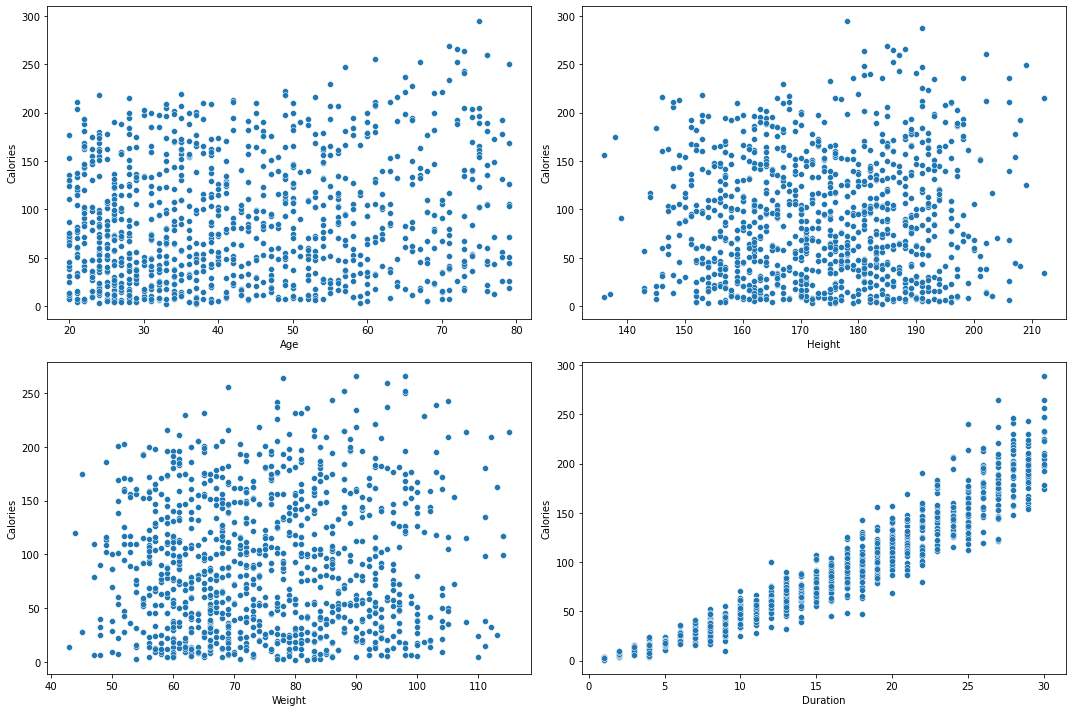

In [33]:
features = ['Age', 'Height', 'Weight', 'Duration']
  
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = data.sample(1000)
    sns.scatterplot(x[col], x['Calories'])
plt.tight_layout()
plt.show()

As expected higher is the duration of the workout higher will be the calories burnt. But except for that, we cannot observe any such relation between calories burnt and height or weight features.

Here we can observe some real-life observations:

The average height of the boys is higher than girls.
Also, the weight of the girls is lower than that of the boys.
For the same average duration of workout calories burnt by men is higher than that of women.

# Separating features and Target

In [34]:
X= data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [35]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [36]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Training

In [39]:
# Normalizing the features for stable and fast training.
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [40]:
linreg = LinearRegression()
linreg.fit(X_train , Y_train)
linreg_prediction = linreg.predict(X_test)

In [41]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  8.39
Linear Regression Mean Squared Error(MSE) :  130.09
Linear Regression Root Mean Squared Error(RMSE) :  11.41


In [71]:
XGBReg = XGBRegressor()
XGBReg.fit=(X_train , Y_train)

#model.fit(X_train,Y_train)

In [52]:
XGBReg_prediction = model.predict(X_test)
print(XGBReg_prediction )

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [56]:
print("XGBRegressor Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , linreg_prediction) , 2))
print("XGBRegressor Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , linreg_prediction) , 2))
print("XGBRegressor Root Mean Squared Error(RMSE) : " ,round(np.sqrt(metrics.mean_squared_error(Y_test , linreg_prediction)) , 2))

XGBRegressor Mean Absolute Error(MAE) :  8.39
XGBRegressor Mean Squared Error(MSE) :  130.09
XGBRegressor Root Mean Squared Error(RMSE) :  11.41


So we have just implemented a simple Linear Regression to predict the calories burned with various parameters.Our RMSE for Linear Regression is about 12 which is acceptable.As just I said it is a simple model.We can reduce this errors with just replacing simple model with more complex model.

RandomForestRegressor Algorithm In this section I will be using the GridSearchCV on of the cross-validation methods that we use for selecting hyperparameters.

In this section , I will be using 3 hyperparameters for RandomForestRegressor algorithm which is n_estimators , max_features and max_depth.This will run on 5 splits and the split with highest accuracy will be picked.

In [58]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , Y_train)
random_reg_prediction = random_reg.predict(X_test)

In [59]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.21
RandomForest Mean Squared Error(MSE) :  62.13
RandomForest Root Mean Squared Error(RMSE) :  7.88


# Conclusion 

From the analysis we met with a conclusion that, we get a slightly better result with RandomForestRegressor algorithm. As we can see the RMSE for ReandomForestRegressor 7.88 whic is lower than Linear Regresssion's and XGBRegressor's RMSE 11.41.It means that we can make better predictions with RandomForestRegressor. 



Mean absolute error imply absolute error ought to be as low as viable.. it is not anything but the difference between the actual and predicted values through the models. The mean absolute error value that is getting in Random Forest Regressor is 5.21 which is a good value.The error values is very less. Therefore we can conclude that the best model for the calorie burn prediction is Random Forest Regressor.

And now let's make a prediction to test model's performance.First we selected an example randomly and passed some numbers (close to feature values of the example) to the model and compared the results.

In [93]:
data.iloc[34]

Gender          0.0
Age            22.0
Height        182.0
Weight         84.0
Duration       29.0
Heart_Rate    114.0
Body_Temp      41.0
Calories      200.0
Name: 34, dtype: float64

In [92]:
X_array = np.array([[22,182,84,29,114,41,0]]).reshape(1,-1)
Y_pred =random_reg.predict(X_array)
print("Prediction :" , round(Y_pred[0],2))

Prediction : 207.3


As we can see this model did a good job and the predicted value is close to the real value in the dataset.

# Let's Calculate calories Burnt for unkown data

In [78]:
#unkwon Data
#X_array = np.array([[Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Gender]])
X_array = np.array([[22,180,88,29,120,40,0]]).reshape(1,-1)
Y_pred =random_reg.predict(X_array)
print("Calories_Burnt_Prediction is :" , round(Y_pred[0],2))

Calories_Burnt_Prediction is : 207.3


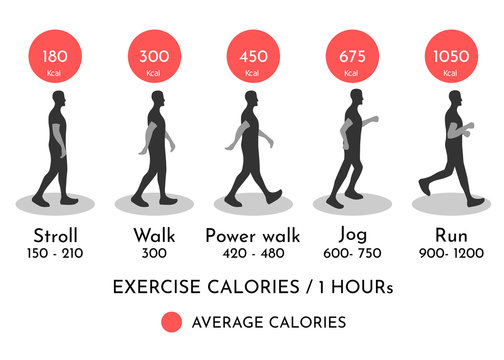

In [91]:
from IPython.display import Image
import os
Image('Calories burnt representation.jpg')

In [79]:
#Pandas profiling
import pandas_profiling as pp
# run the profile report
profile = data.profile_report(title='Pandas Profiling Report')
   
# save the report as html file
profile.to_file(output_file="pandas_profiling1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]